In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Set random seed for reproducibility
np.random.seed(42)

In [5]:
def generate_random_data(n, k):
    """
    Generates random data of n points with k dimensions in the range [0, 1).
    Excludes the zero vector (origin).
    """
    data = np.random.rand(n, k)
    return data

def lp_distance(x, y, p):
    """
    Compute Lp distance between two points x and y.
    """
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

def calculate_distances(data, p):
    """
    Calculate the distances from the origin using Lp norms.
    """
    origin = np.zeros(data.shape[1])
    distances = np.array([lp_distance(point, origin, p) for point in data])
    return distances

def compute_statistics(distances):
    """
    Compute minimum, maximum, mean, variance, and relative contrast.
    """
    d_min = np.min(distances)
    d_max = np.max(distances)
    d_mean = np.mean(distances)
    d_var = np.var(distances)
    d_contrast = (d_max - d_min) / d_min
    return d_min, d_max, d_mean, d_var, d_contrast

In [7]:
# Parameters
n = 100  # Number of points
q = 100  # Number of random data sets
dimensions = [2, 3, 4, 5, 10, 20, 30, 50, 100]  # Test dimensions
lp_norms = [0.5, 1, 2, 5, np.inf]  # Lp norms

# To store results
results = {p: {'min': [], 'max': [], 'mean': [], 'variance': [], 'contrast': []} for p in lp_norms}

# Run experiments
for k in dimensions:
    print(f"Running experiment for dimension {k}")
    for p in lp_norms:
        min_vals, max_vals, mean_vals, var_vals, contrast_vals = [], [], [], [], []
        for _ in range(q):
            data = generate_random_data(n, k)
            distances = calculate_distances(data, p)
            d_min, d_max, d_mean, d_var, d_contrast = compute_statistics(distances)
            min_vals.append(d_min)
            max_vals.append(d_max)
            mean_vals.append(d_mean)
            var_vals.append(d_var)
            contrast_vals.append(d_contrast)
        
        # Store the average statistics over q random data sets
        results[p]['min'].append(np.mean(min_vals))
        results[p]['max'].append(np.mean(max_vals))
        results[p]['mean'].append(np.mean(mean_vals))
        results[p]['variance'].append(np.mean(var_vals))
        results[p]['contrast'].append(np.mean(contrast_vals))

Running experiment for dimension 2
Running experiment for dimension 3
Running experiment for dimension 4
Running experiment for dimension 5
Running experiment for dimension 10
Running experiment for dimension 20
Running experiment for dimension 30
Running experiment for dimension 50
Running experiment for dimension 100


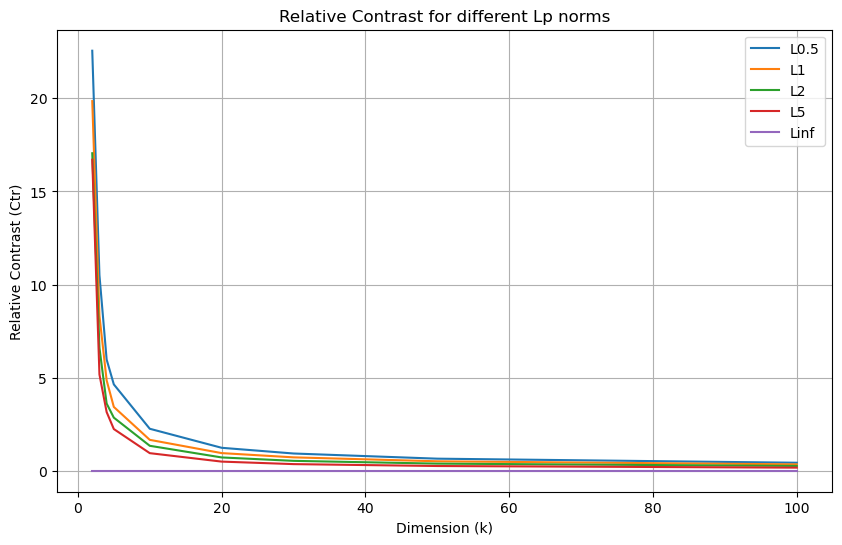

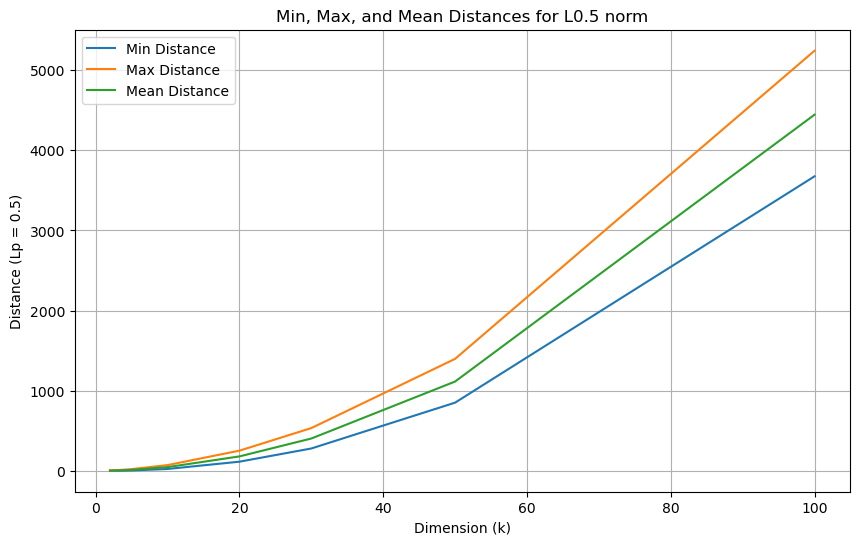

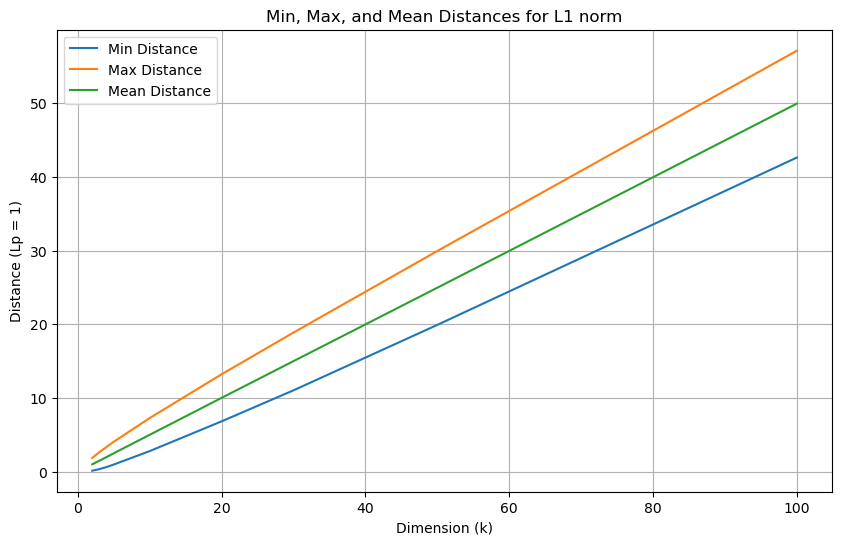

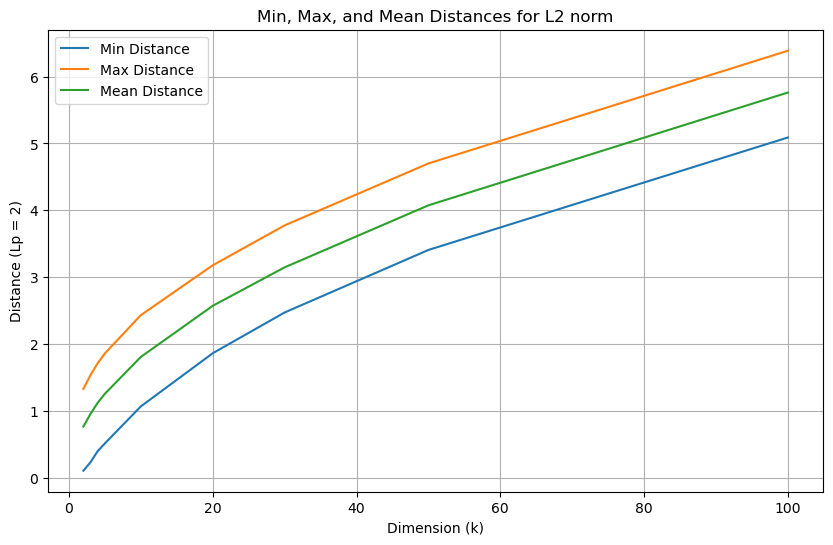

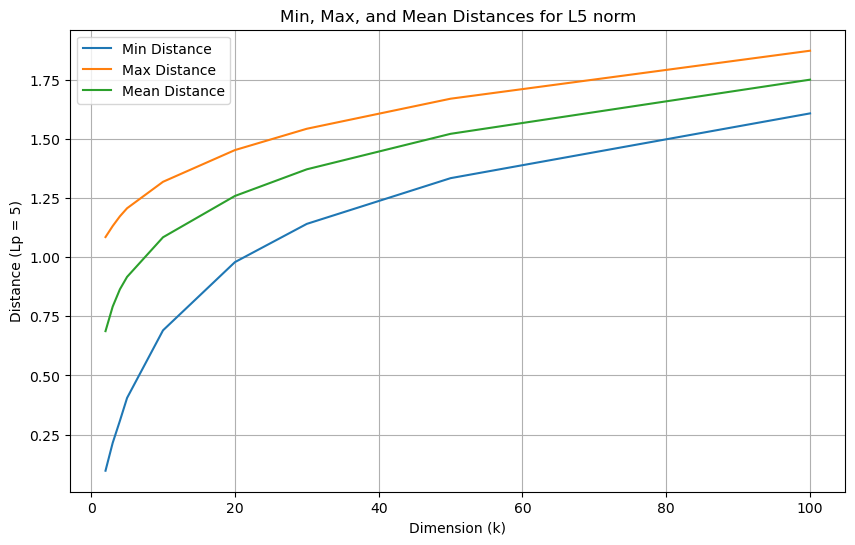

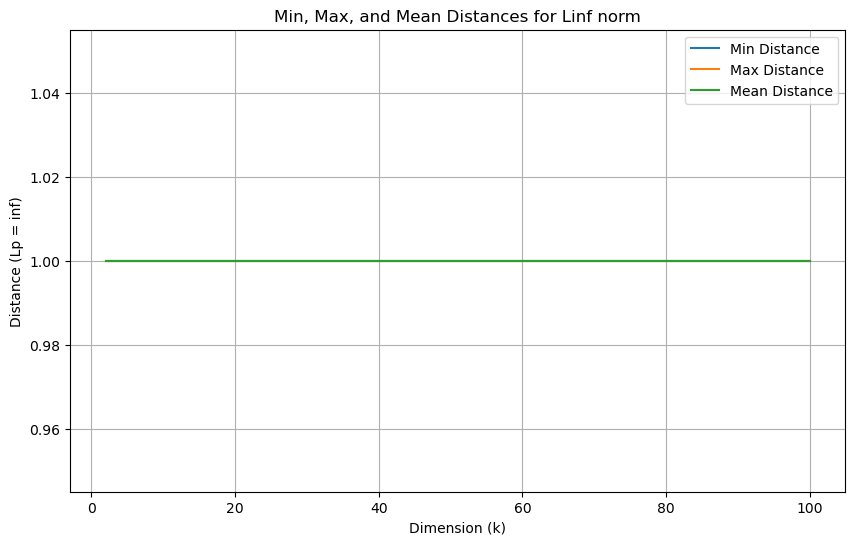

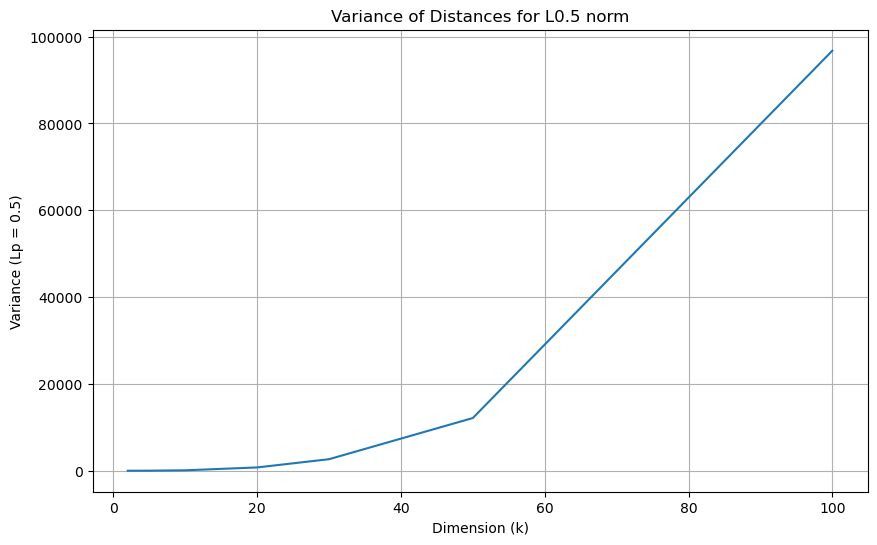

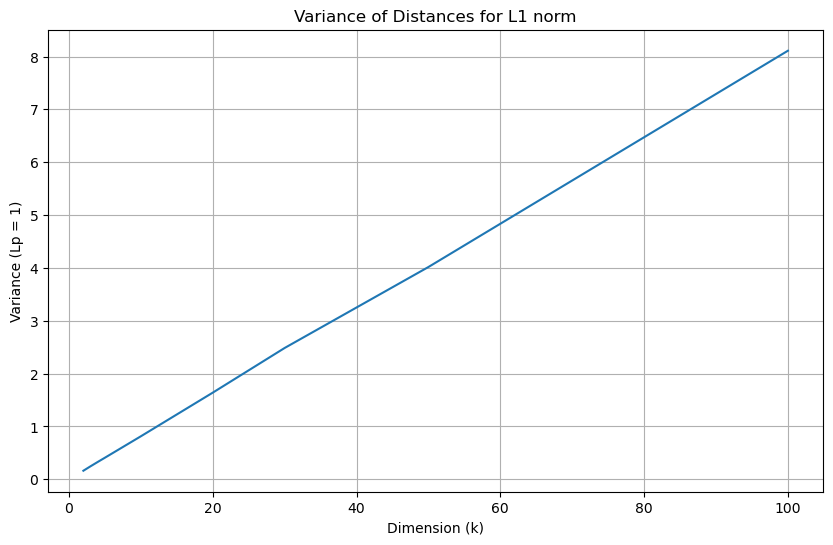

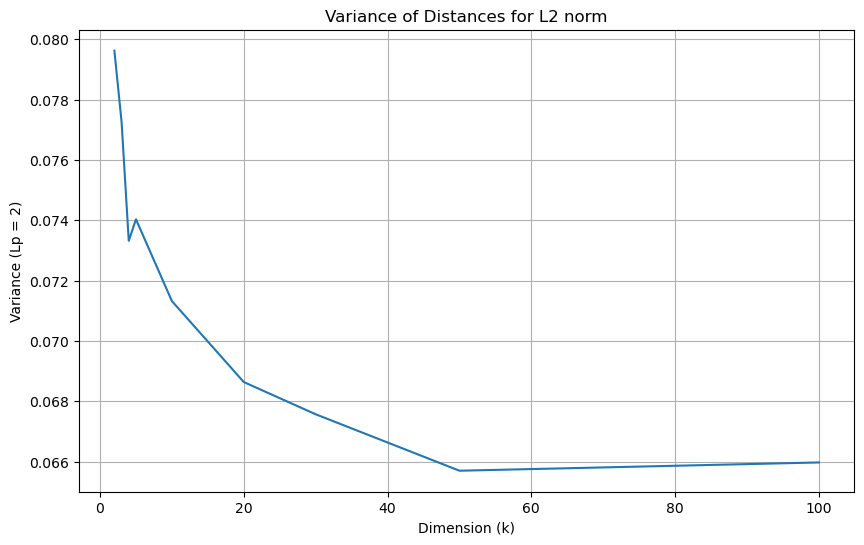

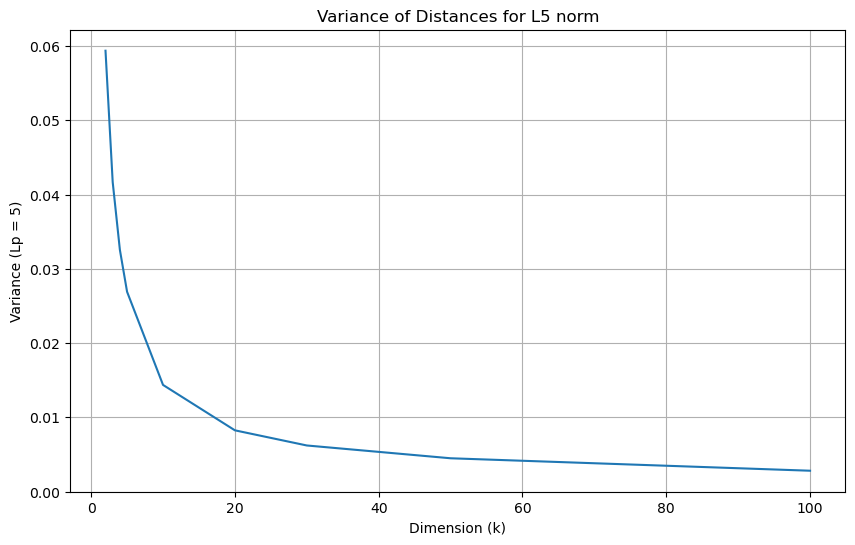

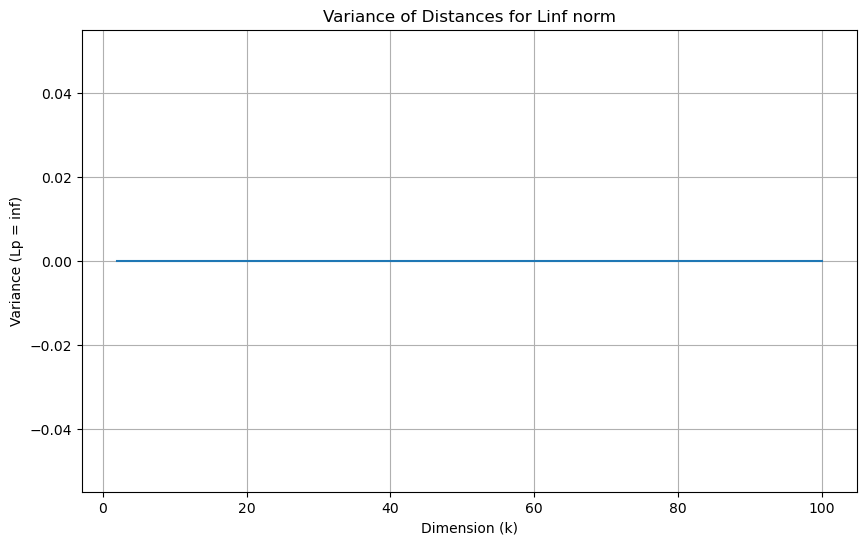

In [8]:
# Plot relative contrast for all Lp norms in one plot
plt.figure(figsize=(10, 6))
for p in lp_norms:
    plt.plot(dimensions, results[p]['contrast'], label=f'L{p}')
plt.xlabel('Dimension (k)')
plt.ylabel('Relative Contrast (Ctr)')
plt.title('Relative Contrast for different Lp norms')
plt.legend()
plt.grid(True)
plt.show()

# Plot min, max, mean distances for each Lp norm
for p in lp_norms:
    plt.figure(figsize=(10, 6))
    plt.plot(dimensions, results[p]['min'], label='Min Distance')
    plt.plot(dimensions, results[p]['max'], label='Max Distance')
    plt.plot(dimensions, results[p]['mean'], label='Mean Distance')
    plt.xlabel('Dimension (k)')
    plt.ylabel(f'Distance (Lp = {p})')
    plt.title(f'Min, Max, and Mean Distances for L{p} norm')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot variance of distances for each Lp norm
for p in lp_norms:
    plt.figure(figsize=(10, 6))
    plt.plot(dimensions, results[p]['variance'])
    plt.xlabel('Dimension (k)')
    plt.ylabel(f'Variance (Lp = {p})')
    plt.title(f'Variance of Distances for L{p} norm')
    plt.grid(True)
    plt.show()